# **Pooling**
---


### 🧑‍💼 **Shuvendu Pritam Das**  
*Data Science / ML Enthusiast*  

- **GitHub:** [SPritamDas](https://github.com/SPritamDas/My-Profile)  
- **LinkedIn:** [Shuvendu Pritam Das](https://www.linkedin.com/in/shuvendupritamdas/)  
- **Email:** shuvendupritamdas181@gmail.com  

---

#### MNIST Dataset

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

import os
import time
import sys
import datetime
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn import datasets
from sklearn.decomposition import  PCA, KernelPCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score, roc_curve, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation,Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.regularizers import l2, l1, l1_l2
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Portfolio/100 DAYS OF DL/Datasets/train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [4]:
df.shape

(42000, 785)

In [5]:
x = df.iloc[:, 1:].values.reshape(-1, 28, 28, 1)
y = df.iloc[:, 0]

In [6]:
model = Sequential()
# 1st Convolution Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1),padding='same'))
#Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'))
# 2nd Convolution Layer
model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
#Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'))
# Flatten Layer for FC Layer
model.add(Flatten())
# FC Layer - 1
model.add(Dense(128, activation='relu'))
# Batch Normalization
model.add(BatchNormalization())
# Dropout Layer
model.add(Dropout(0.2))
# FC Layer - 2 (Output)
model.add(Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         200,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,202 (828.91 KB)

 Trainable params: 211,946 (827.91 KB)

 Non-trainable params: 256 (1.00 KB)

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
history= model.fit(x, y, epochs=100, batch_size=64, validation_split=0.2, callbacks =[EarlyStopping(monitor = 'accuracy',min_delta =0.001,patience = 3, verbose = 1, mode = 'max', restore_best_weights=True)])

Epoch 1/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.9026 - loss: 0.3270 - val_accuracy: 0.9808 - val_loss: 0.0666
Epoch 2/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 39s 71ms/step - accuracy: 0.9847 - loss: 0.0531 - val_accuracy: 0.9786 - val_loss: 0.0653
Epoch 3/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 41s 71ms/step - accuracy: 0.9879 - loss: 0.0389 - val_accuracy: 0.9731 - val_loss: 0.0874
Epoch 4/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 40s 70ms/step - accuracy: 0.9910 - loss: 0.0317 - val_accuracy: 0.9844 - val_loss: 0.0516
Epoch 5/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 38s 73ms/step - accuracy: 0.9921 - loss: 0.0236 - val_accuracy: 0.9894 - val_loss: 0.0367
Epoch 6/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 39s 68ms/step - accuracy: 0.9942 - loss: 0.0186 - val_accuracy: 0.9852 - val_loss: 0.0491
Epoch 7/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 45s 76ms/step - accuracy: 0.9951 - loss: 0.0151 - val_accuracy: 0.9883 - val_loss: 0.0444
Epoch 8/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 39s 74ms/step - accuracy: 0.9962 - loss: 0

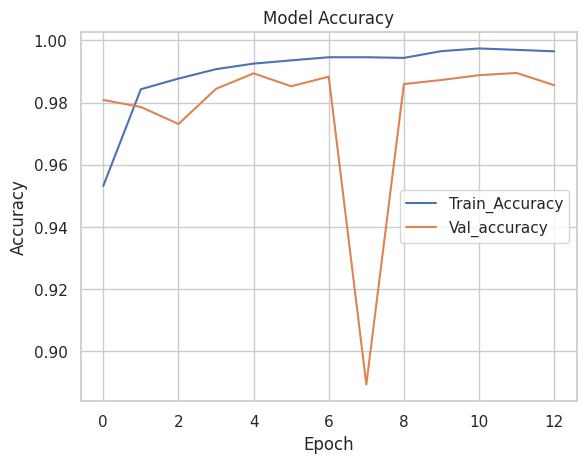

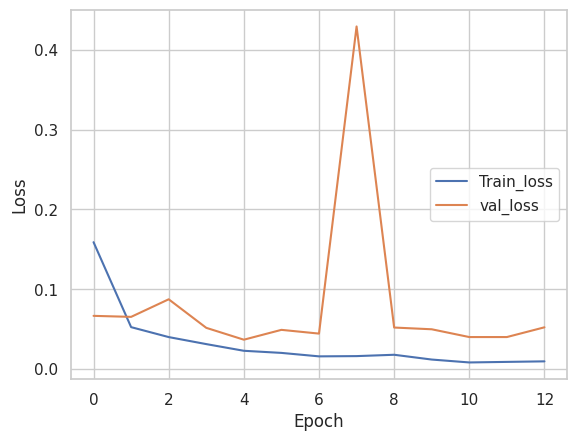

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_Accuracy', 'Val_accuracy'], loc='center right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train_loss','val_loss'], loc='center right')
plt.show()